# 7.4 앙상블

앙상블 모형이란, 여러개의 모형을 결합하여 하나의 모형일때의 성능보다 더 나은 성능을 기대할 수 있는 모형을 의미힌다. 

$f_{ensemble}(x)=f_{1}(x)+...+f_{m}(x)$

### 7.4.1 부스팅(Boosting)

만들어진 $f_{1}(x)$모형이 있다고 할때, $f_{1}(x)$모형이 맞추지 못한 데이터에 대하여 이를 보완하여 $f_{2}(x)$를 생성한다. 

부스팅 모형의 대표적인 예시로는 adaboost, xgboost(gradient boost)가 있다. 

xgboost에서 각 $f_{i}(x)$들은 의사결정나무를 사용한다. 

#### 7.4.1.1분류 

XGBoost 모형을 이용해서 유방암 데이터를 불러오자. 

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
data_x = data.data
data_y = data.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [4]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=2020)

In [5]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [7]:
#pip install xgboost

In [6]:
import xgboost

In [9]:
model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, max_depth=7)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

위에서 n_estimators 는 결합하는 모형의 개수, learning_rate는 학습속도, max_depth는 의사결정나무들의 최대 깊이를 의미한다.

위의 변수들은 초매개변수이다.

In [10]:
model.fit(train_x_minmax,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

이번에는 예측을 해보자.

In [11]:
model.predict(test_x_minmax)

array([ 4.82969117e-05,  9.85928237e-01,  1.00114655e+00, -4.60418414e-06,
        1.00356197e+00,  1.00012338e+00,  4.82969117e-05,  2.63679447e-03,
        3.30665280e-05,  3.30665280e-05,  9.99653578e-01,  1.00550377e+00,
        7.43162483e-02,  1.00262833e+00,  9.99873102e-01,  9.99985874e-01,
        1.00035703e+00,  1.00927198e+00,  1.09853179e-04,  2.99085025e-02,
        3.77138989e-04,  3.89974593e-05, -1.01815513e-05,  1.00015879e+00,
        1.00607669e+00,  9.81934965e-01,  1.83534220e-01,  9.95911539e-01,
        1.00056601e+00,  9.07098183e-06,  1.69547200e-02,  9.25752595e-02,
        9.90114808e-01,  8.98722470e-01,  4.22559679e-05,  9.99972939e-01,
        4.97084766e-05,  7.03239202e-05,  9.99972939e-01,  9.65543866e-01,
        1.36239757e-03,  5.42123355e-02,  1.00803304e+00,  9.86868560e-01,
        8.76764716e-06,  6.75264835e-01,  1.00015879e+00,  4.82969117e-05,
        4.82969117e-05,  9.99972939e-01,  1.09853179e-04,  9.99304831e-01,
        1.00008154e+00, -

분류모형을 학습했지만, preddict 결과값은 수치형이 나왔다.

그 이유는, xgboost는 class에 대한 확률을 예측값으로 반환하기 때문이다.

따라서, 예측된 class는 다음과 같다. 

In [12]:
pred_class = []
result = model.predict(test_x_minmax) 
for i in range(0,len(test_x)):
    if result[i] > 0.5:
        pred_class.append(1)
    else:
        pred_class.append(0)

이번에는 검증데이터에 대한 정확도를 구해보자. 

In [13]:
model.score(test_x_minmax,test_y)

0.8587722925212702

#### 문제7.8
Adaboost를 이용해서 유방암 데이터를 학습해라. (구글링 해서 패키지 검색)

In [18]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(train_x_minmax, train_y)

AdaBoostClassifier()

#### 문제7.9

Boston house 데이터를 이용해서 xgboost 회귀모형을 학습해라.

단, xgboost 회귀모형은 분류모형과 같은 xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, max_depth=7) 코드를 사용한다. 

In [21]:
from sklearn.datasets import load_boston

data = load_boston()
data_x = data.data
data_y = data.target

In [56]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

In [57]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [58]:
import xgboost

model =  xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, max_depth=7)
model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
model.score(train_x, train_y)

0.9985125725265611

### 7.4.2 배깅(Bagging)

배깅은 주어진 데이터를 복원추출을 이용해서 생성된 데이터로 학습된 여러개의 모형으로 앙상블 모형을 만드는 방법이다. 

#### 7.4.2.1 분류

In [62]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [63]:
data_x = data.data
data_y = data.target

In [69]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

In [70]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

모형을 만들어보자. 

In [71]:
from sklearn.ensemble import BaggingClassifier

In [72]:
model = BaggingClassifier(n_estimators=100)

In [73]:
model.fit(train_x_minmax,train_y)

BaggingClassifier(n_estimators=100)

In [74]:
model.predict(test_x_minmax)

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [75]:
model.score(test_x_minmax,test_y)

0.958041958041958

#### 문제7.10

from sklearn.ensemble import BaggingRegressor 모형을 이용해서 Boston house 데이터에 대하여 bagging 모형을 학습해라. 

In [77]:
from sklearn.datasets import load_boston
data= load_boston()

In [78]:
data.x = data.data
data.y = data.target

In [79]:
train_x, test_x, train_y, test_y = train_test_split(data.x, data.y)

In [80]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [81]:
from sklearn.ensemble import BaggingRegressor 

bagging = BaggingRegressor()

In [82]:
bagging.fit(train_x_minmax, train_y)

BaggingRegressor()

In [87]:
bagging.score(train_x_minmax, train_y)

0.9824720074741855

## 7.4.3 랜덤포레스트 

배깅과 같은 방식으로 데이터를 복원추출해서 의사결정나무 모형을 생성한다.

단, 의사결정나무를 생성할때 사용되는 데이터의 feature의 개수를 랜덤으로 뽑아서 사용한다.

#### 7.4.3.1 분류 

앞에서의 breast cancer 데이터를 이용해보자. 

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model = RandomForestClassifier()

In [94]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [95]:
data_x = data.data
data_y = data.target

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [96]:
model.fit(train_x_minmax,train_y)

RandomForestClassifier()

In [97]:
model.score(test_x_minmax,test_y)

0.958041958041958

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(test_y,model.predict(test_x_minmax))

array([[57,  5],
       [ 1, 80]], dtype=int64)

#### 문제7.11  

앞에서의 랜덤포레스트 모형을 다양한 초매개변수를 이용해서 학습하고, 가장 좋은 성능을 보이는 모형을 찾아라. 

In [101]:
model = RandomForestClassifier(n_estimators=200)
model.fit(train_x_minmax,train_y)
model.score(test_x_minmax,test_y)

0.958041958041958

In [102]:
model = RandomForestClassifier(max_depth=7)
model.fit(train_x_minmax,train_y)
model.score(test_x_minmax,test_y)

0.958041958041958

#### 문제7.12 

RandomForestRegressor 패키지를 이용해서 Boston House 데이터를 학습해라. 

In [103]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_x_minmax,train_y)
model.score(test_x_minmax,test_y)

0.8670430306650737

# 7.5 서포트 벡터 머신(SVM)

In [104]:
import numpy as np

In [105]:
label_0 = np.array([[3,8],[8,9],[7,10],[7,9],[8,11]])
label_1 = np.array([[10,6],[8,4],[9,6],[10,7],[8,6] ])

In [106]:
x_m1 = [i for i in range(0,11)]
y_m1 = [i-2 for i in range(0,11)]
y_m2 = [i+1 for i in range(0,11)]
y_m3 = [i-0.5 for i in range(0,11)]

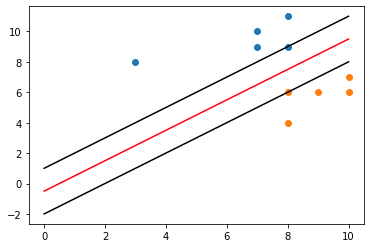

In [107]:
import matplotlib.pyplot as plt
plt.scatter(label_0[:,0],label_0[:,1])
plt.scatter(label_1[:,0],label_1[:,1])
plt.plot(x_m1,y_m1,color= "black")
plt.plot(x_m1,y_m2,color= "black")
plt.plot(x_m1,y_m3,color= "red")

위의 상황에서 빨간색 선을 결정경계 라고 해보자. 

즉, 빨간색 선보다 위의 있는 데이터들은 파란색 그룹 아래 있는 데이터들은 주황색 그룹으로 분류하게 되는 경계이다.


이때, 검은색 선과 빨간색 선사이의 거리를 마진(margin)이라고 정의하며 

서포트 벡터 머신은 이러한 마진을 최대화 하는 방향으로 학습하는 모형이다.  

#### 서포트 벡터 머신 장점과 단점 

장점: 정확도가 높은 편에 속한다.

단점: 모형 학습시간이 오래걸리고, 설명과 해석이 어렵다. 

#### 7.5.1 분류 

In [108]:
from sklearn import svm

In [109]:
model = svm.SVC(C=1,kernel = "rbf")

C : 작을수록 모델이 단순해지고, 커질수록 모델이 복잡해진다.

kernel : 데이터를 선형분리 가능한 고차원 공간으로 보내주는 함수들 
    
kernel = rbf, lienar 등이 있다. 

In [110]:
model.fit(train_x_minmax,train_y)

SVC(C=1)

In [111]:
model.score(test_x_minmax,test_y)

0.972027972027972

#### 7.5.2 회귀

In [112]:
from sklearn import datasets

In [113]:
data =  datasets.load_boston()
data_x = data.data
data_y = data.target
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=15)

In [114]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [115]:
model = svm.SVR()
model.fit(train_x_minmax,train_y)

SVR()

In [116]:
model.score(test_x_minmax,test_y)

0.6120522459659947